In [ ]:
# Hoang Dieu Linh
# ID: 11202127

# EX1

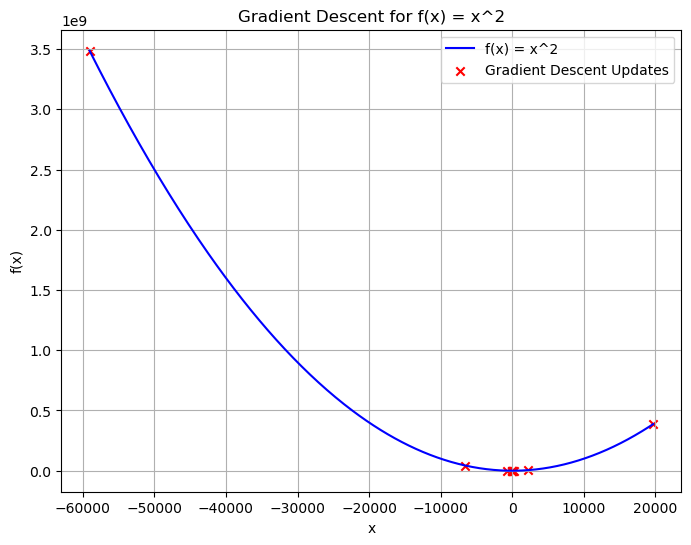

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize x
x = 3

# Learning rate
learning_rate = 2

# Number of iterations
num_iterations = 10

# Lists to store x and f(x) values for plotting
x_values = []
fx_values = []

# Perform gradient descent and store values
for i in range(num_iterations):
    # Calculate f(x) = x^2
    fx = x**2
    
    # Store current values
    x_values.append(x)
    fx_values.append(fx)
    
    # Calculate the gradient of f(x) = x^2
    gradient = 2 * x
    
    # Update x using gradient descent
    x = x - learning_rate * gradient

# Create an array of x values for the plot
x_plot = np.linspace(min(x_values) - 1, max(x_values) + 1, 400)
fx_plot = x_plot**2  # Calculate f(x) for the entire range

# Plot the function f(x) = x^2
plt.figure(figsize=(8, 6))
plt.plot(x_plot, fx_plot, label='f(x) = x^2', color='blue')
plt.scatter(x_values, fx_values, c='red', marker='x', label='Gradient Descent Updates')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent for f(x) = x^2')
plt.legend()
plt.grid(True)
plt.show()


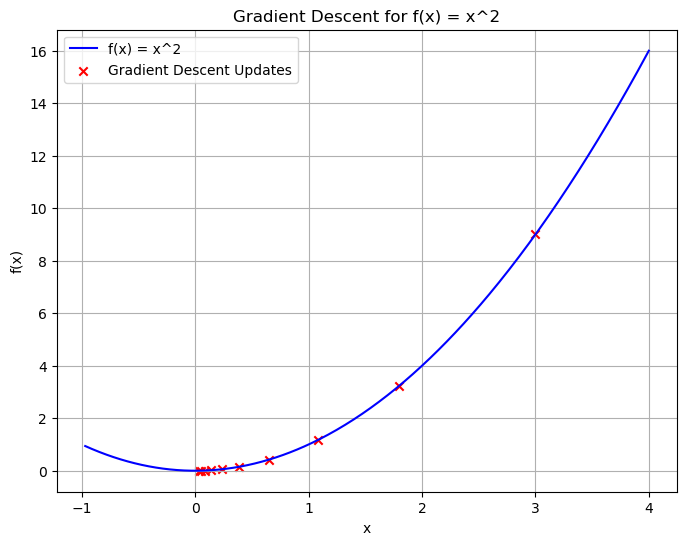

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize x
x = 3

# Learning rate
learning_rate = 0.2

# Number of iterations
num_iterations = 10

# Lists to store x and f(x) values for plotting
x_values = []
fx_values = []

# Perform gradient descent and store values
for i in range(num_iterations):
    # Calculate f(x) = x^2
    fx = x**2
    
    # Store current values
    x_values.append(x)
    fx_values.append(fx)
    
    # Calculate the gradient of f(x) = x^2
    gradient = 2 * x
    
    # Update x using gradient descent
    x = x - learning_rate * gradient

# Create an array of x values for the plot
x_plot = np.linspace(min(x_values) - 1, max(x_values) + 1, 400)
fx_plot = x_plot**2  # Calculate f(x) for the entire range

# Plot the function f(x) = x^2
plt.figure(figsize=(8, 6))
plt.plot(x_plot, fx_plot, label='f(x) = x^2', color='blue')
plt.scatter(x_values, fx_values, c='red', marker='x', label='Gradient Descent Updates')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent for f(x) = x^2')
plt.legend()
plt.grid(True)
plt.show()


# EX2

# a)

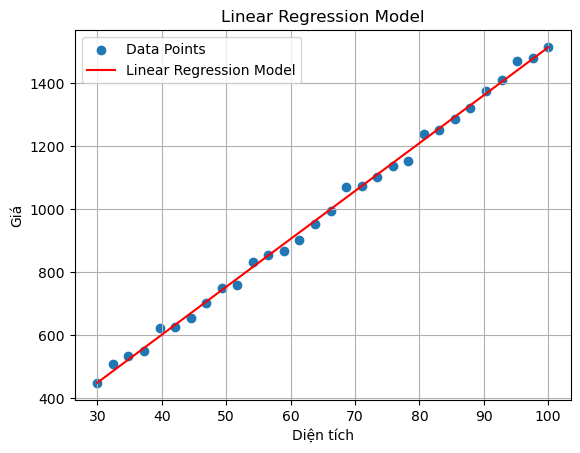

In [31]:
def add_intercept(x):
    new_x = np.c_[np.ones(x.shape[0]), x]
    return new_x

class LinearRegression:
    def __init__(self):
        self.theta = None

    def fit(self, x, y):
        x = add_intercept(x)
        p = np.linalg.inv(x.T.dot(x))
        self.theta = p.dot(x.T).dot(y)
        return self.theta

    def predict(self, inp):
        return self.theta[0] + inp * self.theta[1]

    
url = 'https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_linear.csv'
df = pd.read_csv(url)
X = df['Diện tích']
y = df['Giá']

# Instantiate the LinearRegression class
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

y_pred = model.predict(X)


plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred, color='red', label='Linear Regression Model')
plt.xlabel('Diện tích')
plt.ylabel('Giá')
plt.legend()
plt.title('Linear Regression Model')
plt.grid(True)
plt.show()

# b)

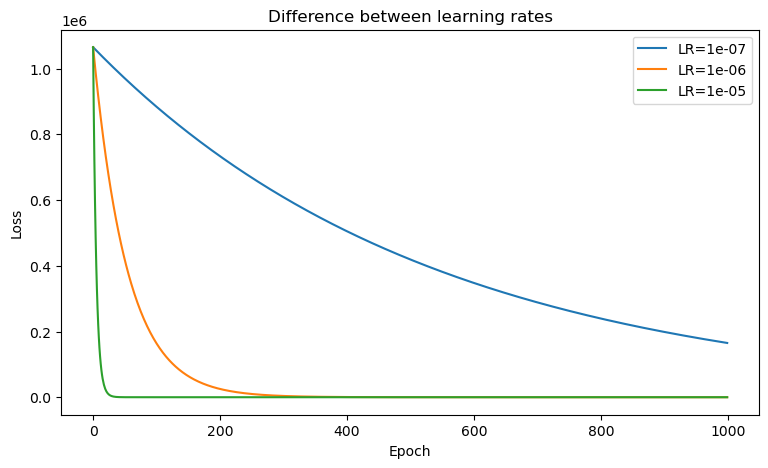

In [34]:
url = 'https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_linear.csv'
df = pd.read_csv(url)
s = df['Diện tích']
p = df['Giá']

a = 0.0
b = 0.0
num_iterations = 1000

learning_rates = [0.0000001, 0.000001, 0.00001]

plt.figure(figsize=(9, 5))

for lr in learning_rates:
    a = 0.0
    b = 0.0
    loss_history = []

    for i in range(num_iterations):
        predicted = a * s + b
        error = predicted - p
        loss = np.mean(error ** 2)
        loss_history.append(loss)

        gradient_a = 2 * np.mean(error * s)
        gradient_b = 2 * np.mean(error)

        a = a - lr * gradient_a
        b = b - lr * gradient_b

    plt.plot(range(num_iterations), loss_history, label=f'LR={lr}')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Difference between learning rates')
plt.show()


In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

url = 'https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_linear.csv'
data = pd.read_csv(url).values

# Split the dataset into features (X) and target (y)
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")


MSE: 265.2773941996129
RMSE: 16.287338462732727
MAE: 11.515439957022883
MAPE: 1.113768974317674%
